In [1]:
#pip install opencv-python opencv-contrib-python

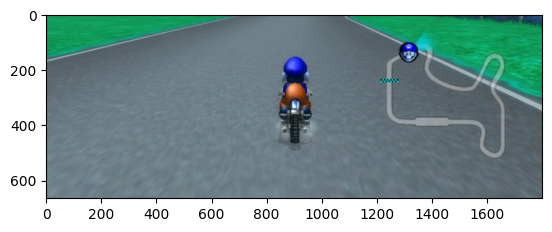

In [1]:
import cv2
cv2.__version__

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import the image
img_orig = cv2.imread('dataset/08b97b7c-58ad-4a11-bfb7-fd47ebbe2980.png')
plt.imshow(img_orig)


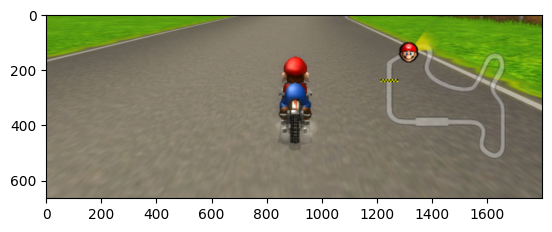

In [2]:
# convert the image from BGR into RGB
img_rgb = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

(-0.5, 1799.5, 664.5, -0.5)

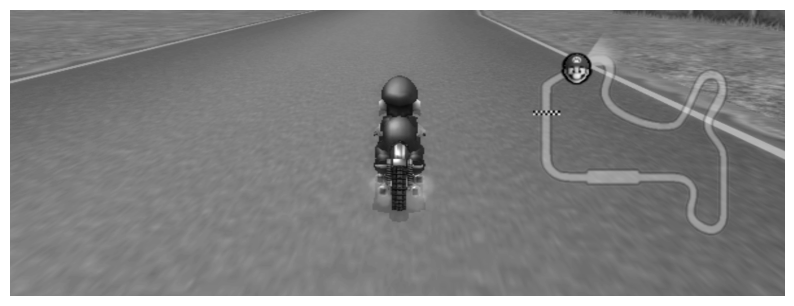

In [3]:
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (10, 10))
plt.imshow(img_gray, cmap = 'gray')
plt.axis('off')

(-0.5, 1799.5, 484.5, -0.5)

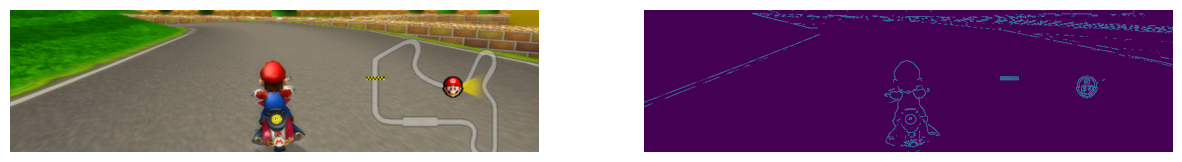

In [35]:
img_orig = cv2.imread('dataset/02f3d24d-2f59-43a1-8688-9da76b72b3b8.png')
img_rgb = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)

# canny detection without blurring
img_canny = cv2.Canny(img_rgb, threshold1=250, threshold2=250)
plt.figure(figsize = (15, 15))
plt.subplot(1, 2, 1); plt.imshow(img_rgb)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(img_canny)
plt.axis('off')

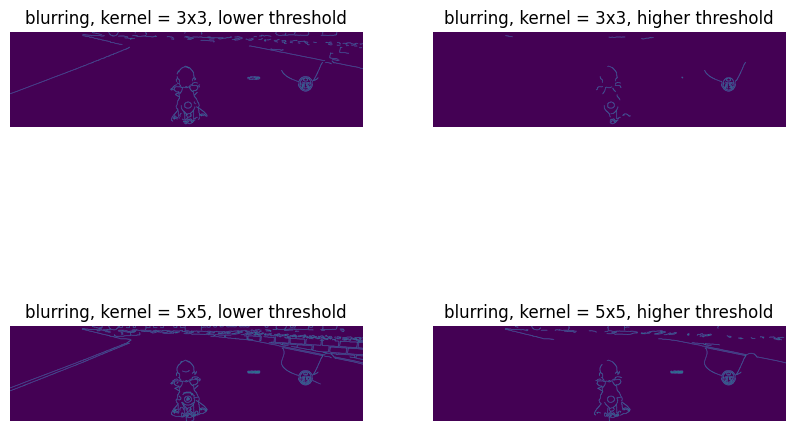

In [36]:
# set the lower and upper threshold
med_val = np.median(img_orig)
lower = int(max(0, .7 * med_val))
upper = int(min(255, 1.3 * med_val))

# blurring with ksize = 3
img_k3 = cv2.blur(img_orig, ksize = (7, 7))
# canny detection with different thresholds
edges_k3 = cv2.Canny(img_k3, threshold1 = lower, threshold2 = upper)
edges_k3_2 = cv2.Canny(img_k3, lower, upper + 75)

# blurring with ksize = 5 
img_k5 = cv2.blur(img_orig, ksize = (5, 5))
# canny detection with different thresholds
edges_k5 = cv2.Canny(img_k5, lower, upper)
edges_k5_2 = cv2.Canny(img_k5, lower, upper + 75)

# plot the images
images = [edges_k3, edges_k3_2, edges_k5, edges_k5_2]
titles = ['blurring, kernel = 3x3, lower threshold', 
          'blurring, kernel = 3x3, higher threshold', 
          'blurring, kernel = 5x5, lower threshold', 
          'blurring, kernel = 5x5, higher threshold']
plt.figure(figsize = (10, 7))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(titles[i])
        
plt.show()

In [26]:
# Read image
image = cv2.imread('dataset/02f3d24d-2f59-43a1-8688-9da76b72b3b8.png')

# Use canny edge detection
edges = img_canny
 
# Apply HoughLinesP method to 
# to directly obtain line end points
lines_list =[]
lines = cv2.HoughLinesP(
            edges, # Input edge image
            1, # Distance resolution in pixels
            np.pi/180, # Angle resolution in radians
            threshold=120, # Min number of votes for valid line
            minLineLength=25, # Min allowed length of line
            maxLineGap=25 # Max allowed gap between line for joining them
            )
 
# Iterate over points
for points in lines:
      # Extracted points nested in the list
    x1,y1,x2,y2=points[0]
    # Draw the lines joing the points
    # On the original image
    cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)
    # Maintain a simples lookup list for points
    lines_list.append([(x1,y1),(x2,y2)])
     
# Save the result image
cv2.imwrite('resultTest/detectedLines.png',image)

True